In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
file = "../../FoodEnvironmentAtlas.xls"
data = pd.ExcelFile(file)
sheet_dict = {sheet_name: data.parse(sheet_name) for sheet_name in data.sheet_names}

In [3]:
county_census_data = pd.read_csv('county_census_data.csv')

In [4]:
county_census_data

,FIPS,County,Population,Area (km^2),Latitude,Longitude
0,1001,Autauga,54571,1565.358,32.536382,-86.644490
1,1003,Baldwin,182265,5250.712,30.659218,-87.746067
2,1005,Barbour,27457,2342.684,31.870670,-85.405456
3,1007,Bibb,22915,1621.770,33.015893,-87.127148
4,1009,Blount,57322,1685.119,33.977448,-86.567246
...,...,...,...,...,...,...
3138,56037,Sweetwater,43806,27171.784,41.660339,-108.875676
3139,56039,Teton,21294,10920.250,44.049321,-110.588102
3140,56041,Uinta,21118,5406.791,41.284726,-110.558947
3141,56043,Washakie,8533,5808.577,43.878831,-107.669052


In [5]:
access = sheet_dict['ACCESS']
access = access.merge(right = county_census_data.copy(), how='inner')
access['Population'] = county_census_data['Population'].copy()
access['log_Population'] = np.log10(county_census_data['Population'])

In [6]:
access = access.dropna()

In [7]:
access.describe()

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,Population,Area (km^2),Latitude,Longitude,log_Population
count,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,...,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3.029000e+03,3029.000000,3029.000000,3029.000000,3029.000000
mean,30275.458897,20210.171417,19211.591788,87.289104,23.545477,22.871992,5607.310002,5854.121467,137.996385,8.379519,...,0.663257,29.236255,0.015845,1290.068577,1.128437,9.958762e+04,2890.849062,38.383525,-92.307327,4.458155
std,15000.753247,51504.287283,47796.349143,3622.636528,19.872653,19.156735,14040.273048,14126.685891,5766.168276,8.031482,...,3.960636,413.593595,0.075447,5466.198683,1.751514,3.179032e+05,6398.878755,5.171940,12.222441,0.639641
min,1001.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.200000e+01,67.518000,20.855931,-161.950749,1.913814
25%,19009.000000,1712.170774,1648.244355,-10.889169,11.149230,10.997287,613.005047,613.280445,-12.247991,3.515244,...,0.027625,0.000000,0.000000,33.451072,0.221739,1.100800e+04,1198.448000,34.591949,-98.232444,4.041708
50%,29151.000000,4133.456168,4122.419872,-0.068432,19.751898,19.158186,1517.112654,1644.202512,3.482760,6.182610,...,0.072261,1.000000,0.003215,129.655506,0.566969,2.569200e+04,1703.248000,38.386491,-90.619969,4.409798
75%,45039.000000,12908.320126,12978.324082,7.093899,29.577947,28.661371,4577.732240,4825.365658,23.020007,10.327556,...,0.186508,7.000000,0.012953,654.978989,1.319564,6.650100e+04,2570.621000,41.854179,-83.712303,4.822828
max,56045.000000,886068.668386,740267.412661,198601.945315,100.000001,100.000001,292541.789025,259479.516033,316808.975721,72.274456,...,83.844210,21387.063061,2.775812,115781.021513,27.120652,9.818605e+06,245521.234000,69.449343,-67.609354,6.992050


In [8]:
socioeconomic = sheet_dict['SOCIOECONOMIC']
restaurants = sheet_dict['RESTAURANTS']
stores = sheet_dict['STORES']
stores.loc[stores['GROC16'] < 1]

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
117,5013,AR,Calhoun,2,0,-100.0,0.381461,0.0,-100.0,0,...,-14.285714,0.879342,0.762340,-13.305562,1.0,NaN,NaN,0.190730,NaN,NaN
187,6003,CA,Alpine,1,0,-100.0,0.914913,0.0,-100.0,0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,8047,CO,Gilpin,3,0,-100.0,0.553710,0.0,-100.0,0,...,-72.093023,0.652583,0.166306,-74.515681,NaN,NaN,NaN,NaN,NaN,NaN
425,13079,GA,Crawford,1,0,-100.0,0.079271,0.0,-100.0,0,...,-16.528926,0.800265,0.684560,-14.458273,1.0,1.0,0.000000,0.079277,0.081340,2.602896
432,13093,GA,Dooly,1,0,-100.0,0.068493,0.0,-100.0,0,...,4.128440,1.268799,1.377060,8.532504,3.0,2.0,-33.333332,0.205381,0.144425,-29.679377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,48443,TX,Terrell,0,0,0.0,0.000000,0.0,0.0,0,...,NaN,0.000000,1.234568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2793,49033,UT,Rich,1,0,-100.0,0.435730,0.0,-100.0,0,...,0.000000,1.323335,1.254705,-5.186115,2.0,2.0,0.000000,0.871460,0.865052,-0.735295
2859,51081,VA,Greensville,0,0,0.0,0.000000,0.0,0.0,0,...,172.448980,0.689112,1.905129,176.461414,NaN,NaN,NaN,NaN,NaN,NaN
2867,51097,VA,King and Queen,0,0,0.0,0.000000,0.0,0.0,0,...,266.666667,0.141924,0.523585,268.918083,NaN,NaN,NaN,NaN,NaN,NaN


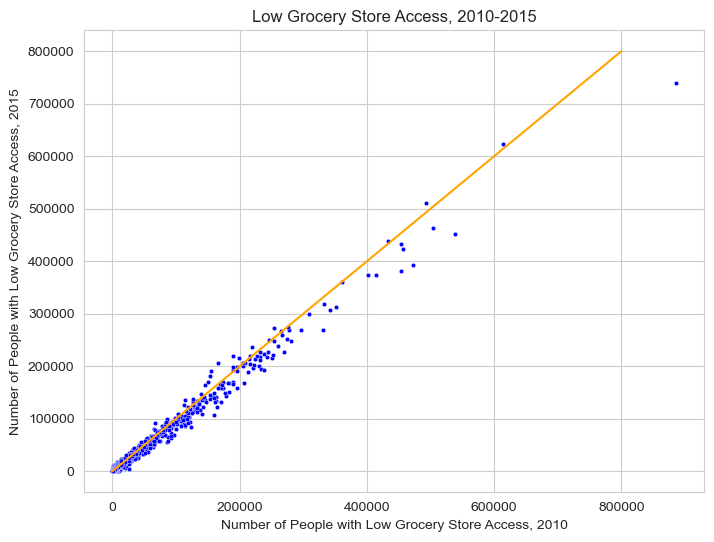

In [9]:
fig = plt.figure(figsize=(8,6))

# Change in number of people with access to a grocery store, 2010-2015
ax = sns.scatterplot(
    data=access,
    x='LACCESS_POP10',
    y='LACCESS_POP15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='Number of People with Low Grocery Store Access, 2010',
    ylabel='Number of People with Low Grocery Store Access, 2015',
    title='Low Grocery Store Access, 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,800000,10000), y = np.linspace(0,800000,10000), color='orange')

plt.show()

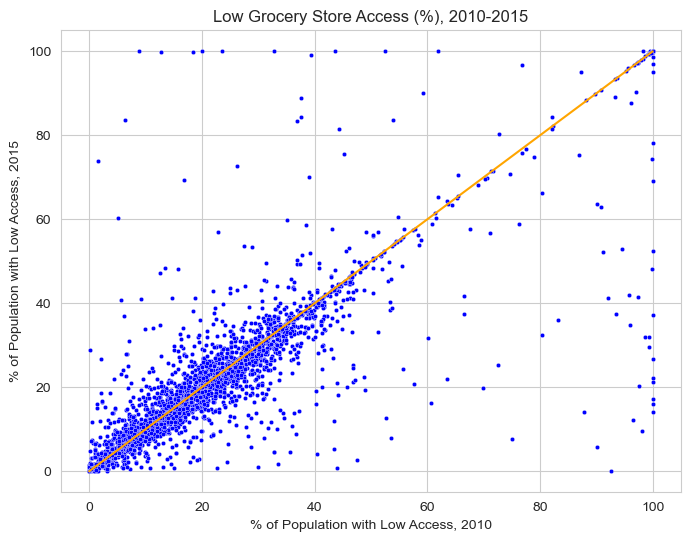

In [10]:
fig = plt.figure(figsize=(8,6))

# Change in % of population with access to a grocery store, 2010-2015
ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_POP10',
    y='PCT_LACCESS_POP15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of Population with Low Access, 2010',
    ylabel='% of Population with Low Access, 2015',
    title='Low Grocery Store Access (%), 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,100,100), y = np.linspace(0,100,100), color='orange')

plt.show()

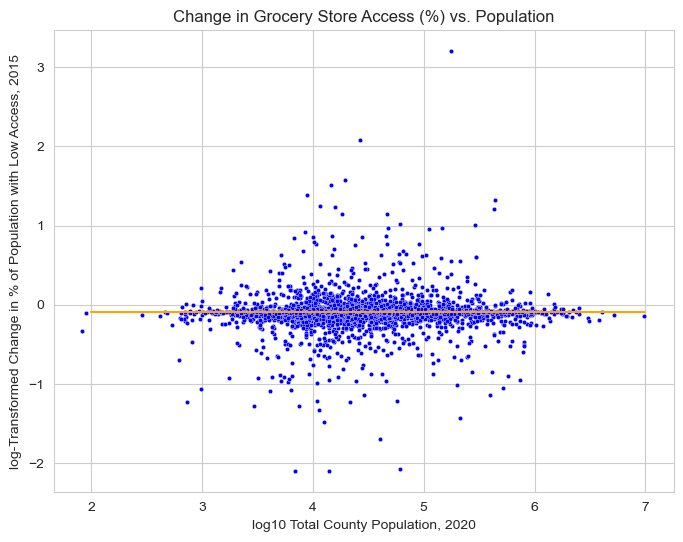

In [11]:
# Change in % of population with access to a grocery store vs. population, 2010-2015
access['log_PCH_pop'] = np.log10(0.01*(access['PCH_LACCESS_POP_10_15'] + 101)) - 0.1

fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=access,
    x='log_Population',
    y='log_PCH_pop',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='log10 Total County Population, 2020',
    ylabel='log-Transformed Change in % of Population with Low Access, 2015',
    title='Change in Grocery Store Access (%) vs. Population')

# Median
sns.lineplot(x=np.linspace(2,7,100), y = access['log_PCH_pop'].median()*(np.ones(100)), color='orange')

plt.show()

In [12]:
num_counties = len(access)
median_pct_pop_2010 = access['PCT_LACCESS_POP10'].median()
pop_thresh = 50

num_pop_10_15 = len(access.loc[(access['PCT_LACCESS_POP10'] >= pop_thresh) & (access['PCT_LACCESS_POP15'] >= pop_thresh)])
print('Number of counties in which the % of population having low access to grocery stores exceeded ' + str(pop_thresh) + '% in both 2010 and 2015: ' 
      + str(num_pop_10_15) + 
      ' (' + str(np.round(100*num_pop_10_15/num_counties,2)) + '%)'
     )

num_pop_10 = len(access.loc[(access['PCT_LACCESS_POP10'] >= pop_thresh) & (access['PCT_LACCESS_POP15'] < pop_thresh)])
print('Number of counties in which the % of population having low access to grocery stores exceeded ' + str(pop_thresh) + '% in 2010 but not in 2015: ' 
      + str(num_pop_10) + 
      ' (' + str(np.round(100*num_pop_10/num_counties,2)) + '%)'
     )

num_pop_15 = len(access.loc[(access['PCT_LACCESS_POP10'] < pop_thresh) & (access['PCT_LACCESS_POP15'] >= pop_thresh)])
print('Number of counties in which the % of population having low access to grocery stores exceeded ' + str(pop_thresh) + '% in 2015 but not in 2010: '
      + str(num_pop_15) + 
      ' (' + str(np.round(100*num_pop_15/num_counties,2)) + '%)'
     )


num_pop_above_median = len(access.loc[(access['PCT_LACCESS_POP10'] >= median_pct_pop_2010)])
num_pop_above_median_and_improved = len(access.loc[(access['PCT_LACCESS_POP10'] >= access['PCT_LACCESS_POP15']) & (access['PCT_LACCESS_POP10'] >= median_pct_pop_2010)])
print('Number of counties whose % of population with low grocery store access in 2010 was above the median, but improved or was equal in 2015: ' 
      + str(num_pop_above_median_and_improved) + 
      ' (' + str(np.round(100*num_pop_above_median_and_improved/num_pop_above_median,2)) + '% of counties above the median % with low access)'
     )

Number of counties in which the % of population having low access to grocery stores exceeded 50% in both 2010 and 2015: 155 (5.12%)
Number of counties in which the % of population having low access to grocery stores exceeded 50% in 2010 but not in 2015: 47 (1.55%)
Number of counties in which the % of population having low access to grocery stores exceeded 50% in 2015 but not in 2010: 32 (1.06%)
Number of counties whose % of population with low grocery store access in 2010 was above the median, but improved or was equal in 2015: 1042 (68.78% of counties above the median % with low access)


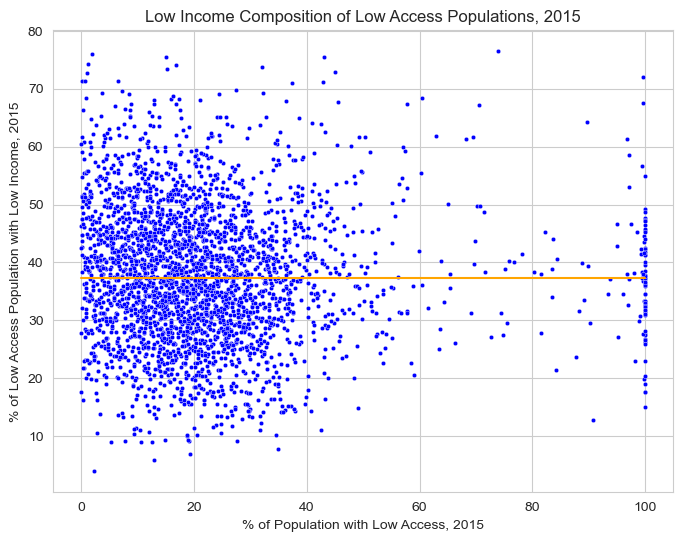

In [13]:
fig = plt.figure(figsize=(8,6))

# Percentage of population with low access in 2015, who are also low income
access['PCT_LACCESS_LOWI15_REL'] = (100*access['PCT_LACCESS_LOWI15']/access['PCT_LACCESS_POP15']).copy()

# Change in % of low income population with access to a grocery store, 2010-2015

ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_POP15',
    y='PCT_LACCESS_LOWI15_REL',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of Population with Low Access, 2015',
    ylabel='% of Low Access Population with Low Income, 2015',
    title='Low Income Composition of Low Access Populations, 2015')

# Median
sns.lineplot(x=np.linspace(0,100,100), y = access['PCT_LACCESS_LOWI15_REL'].median()*(np.ones(100)), color='orange')

plt.show()

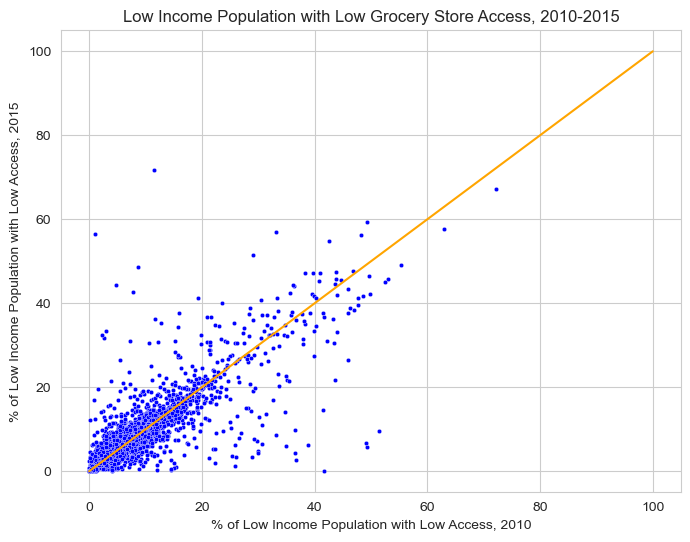

In [14]:
# % of low income population with access to a grocery store vs. total population , 2010-2015

fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_LOWI10',
    y='PCT_LACCESS_LOWI15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of Low Income Population with Low Access, 2010',
    ylabel='% of Low Income Population with Low Access, 2015',
    title='Low Income Population with Low Grocery Store Access, 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,100,100), y = np.linspace(0,100,100), color='orange')

plt.show()

In [15]:
median_pct_lowi_2010 = access['PCT_LACCESS_LOWI10'].median()
lowi_thresh = 50

num_lowi_10_15 = len(access.loc[(access['PCT_LACCESS_LOWI10'] >= lowi_thresh) & (access['PCT_LACCESS_LOWI15'] >= lowi_thresh)])
print('Number of counties in which the % of population having low income and low access to grocery stores exceeded ' + str(lowi_thresh) + '% in both 2010 and 2015: ' 
      + str(num_lowi_10_15) + 
      ' (' + str(np.round(100*num_lowi_10_15/num_counties,2)) + '%)'
     )

num_lowi_10 = len(access.loc[(access['PCT_LACCESS_LOWI10'] >= lowi_thresh) & (access['PCT_LACCESS_LOWI15'] < lowi_thresh)])
print('Number of low income counties in which the % of population having low income and low access to grocery stores exceeded ' + str(lowi_thresh) + '% in 2010 but not in 2015: ' 
      + str(num_lowi_10) + 
      ' (' + str(np.round(100*num_lowi_10/num_counties,2)) + '%)'
     )

num_lowi_15 = len(access.loc[(access['PCT_LACCESS_LOWI10'] < lowi_thresh) & (access['PCT_LACCESS_LOWI15'] >= lowi_thresh)])
print('Number of low income counties in which the % of population having low income and low access to grocery stores exceeded ' + str(lowi_thresh) + '% in 2015 but not in 2010: ' 
      + str(num_lowi_15) + 
      ' (' + str(np.round(100*num_lowi_15/num_counties,2)) + '%)'
     )


num_lowi_above_median = len(access.loc[(access['PCT_LACCESS_LOWI10'] >= median_pct_lowi_2010)])
num_lowi_above_median_and_improved = len(access.loc[(access['PCT_LACCESS_LOWI10'] >= access['PCT_LACCESS_LOWI15']) & (access['PCT_LACCESS_LOWI10'] >= median_pct_lowi_2010)])
print('Number of counties whose % of population with low income and low grocery store access was above the median in 2010, but improved or was equal in 2015: ' 
      + str(num_lowi_above_median_and_improved) + 
      ' (' + str(np.round(100*num_lowi_above_median_and_improved/num_lowi_above_median,2)) + '% of counties above the median %)'
     )

Number of counties in which the % of population having low income and low access to grocery stores exceeded 50% in both 2010 and 2015: 2 (0.07%)
Number of low income counties in which the % of population having low income and low access to grocery stores exceeded 50% in 2010 but not in 2015: 4 (0.13%)
Number of low income counties in which the % of population having low income and low access to grocery stores exceeded 50% in 2015 but not in 2010: 7 (0.23%)
Number of counties whose % of population with low income and low grocery store access was above the median in 2010, but improved or was equal in 2015: 731 (48.25% of counties above the median %)


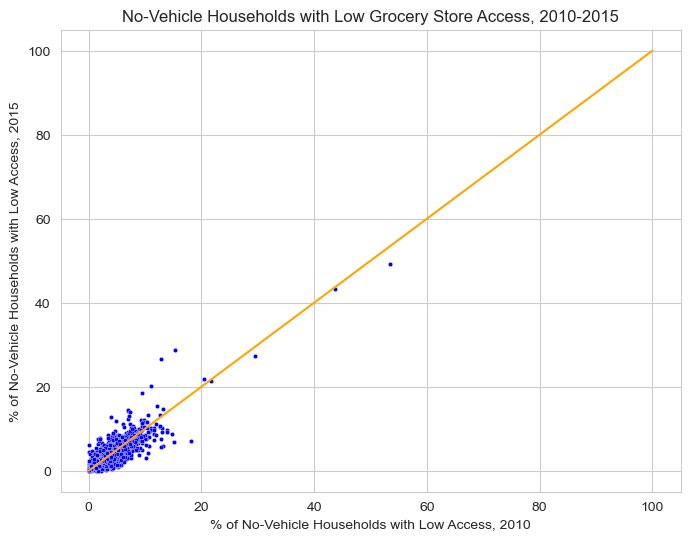

In [16]:
# Change in % of no-vehicle households with access to a grocery store, 2010-2015

fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_HHNV10',
    y='PCT_LACCESS_HHNV15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of No-Vehicle Households with Low Access, 2010',
    ylabel='% of No-Vehicle Households with Low Access, 2015',
    title='No-Vehicle Households with Low Grocery Store Access, 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,100,100), y = np.linspace(0,100,100), color='orange')

plt.show()

In [17]:
median_pct_hhnv_2010 = access['PCT_LACCESS_HHNV10'].median()
hhnv_thresh = 15

num_hhnv_10_15 = len(access.loc[(access['PCT_LACCESS_HHNV10'] >= hhnv_thresh) & (access['PCT_LACCESS_HHNV15'] >= hhnv_thresh)])
print('Number of counties in which the % of households having no car access and low access to grocery stores exceeded ' + str(hhnv_thresh) + '% in both 2010 and 2015: '  
      + str(num_hhnv_10_15) + 
      ' (' + str(np.round(100*num_hhnv_10_15/num_counties,2)) + '%)'
     )

num_hhnv_10 = len(access.loc[(access['PCT_LACCESS_HHNV10'] >= hhnv_thresh) & (access['PCT_LACCESS_HHNV15'] < hhnv_thresh)])
print('Number of counties in which the % of households having no car access and low access to grocery stores exceeded ' + str(hhnv_thresh) + '% in 2010 but not in 2015: '
      + str(num_hhnv_10) + 
      ' (' + str(np.round(100*num_hhnv_10/num_counties,2)) + '%)'
     )

num_hhnv_15 = len(access.loc[(access['PCT_LACCESS_HHNV10'] < hhnv_thresh) & (access['PCT_LACCESS_HHNV15'] >= hhnv_thresh)])
print('Number of counties in which the % of households having no car access and low access to grocery stores exceeded ' + str(hhnv_thresh) + '% in 2015 but not in 2010: ' 
      + str(num_hhnv_15) + 
      ' (' + str(np.round(100*num_hhnv_15/num_counties,2)) + '%)'
     )


num_hhnv_above_median = len(access.loc[(access['PCT_LACCESS_HHNV10'] >= median_pct_hhnv_2010)])
num_hhnv_above_median_and_improved = len(access.loc[(access['PCT_LACCESS_HHNV10'] > access['PCT_LACCESS_HHNV15']) & (access['PCT_LACCESS_HHNV10'] >= median_pct_hhnv_2010)])
print('Number of counties whose % of households with no car access and low grocery store access was above the median in 2010, but improved or was equal in 2015'
      + str(num_hhnv_above_median_and_improved) + 
      ' (' + str(np.round(100*num_hhnv_above_median_and_improved/num_hhnv_above_median,2)) + '% of counties above the median %)'
     )

Number of counties in which the % of households having no car access and low access to grocery stores exceeded 15% in both 2010 and 2015: 6 (0.2%)
Number of counties in which the % of households having no car access and low access to grocery stores exceeded 15% in 2010 but not in 2015: 2 (0.07%)
Number of counties in which the % of households having no car access and low access to grocery stores exceeded 15% in 2015 but not in 2010: 4 (0.13%)
Number of counties whose % of households with no car access and low grocery store access was above the median in 2010, but improved or was equal in 2015796 (52.54% of counties above the median %)


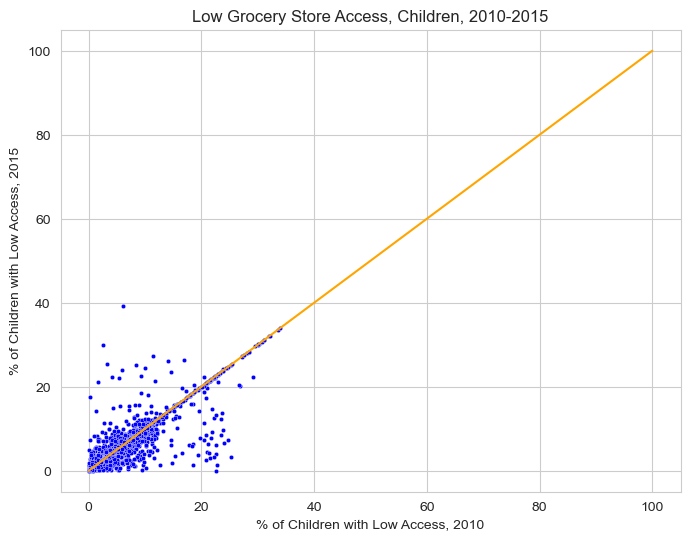

In [18]:
# Change in % of children with access to a grocery store, 2010-2015

fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_CHILD10',
    y='PCT_LACCESS_CHILD15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of Children with Low Access, 2010',
    ylabel='% of Children with Low Access, 2015',
    title='Low Grocery Store Access, Children, 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,100,100), y = np.linspace(0,100,100), color='orange')

plt.show()

In [19]:
median_pct_child_2010 = access['PCT_LACCESS_CHILD10'].median()
child_thresh = 15

num_child_10_15 = len(access.loc[(access['PCT_LACCESS_CHILD10'] >= child_thresh) & (access['PCT_LACCESS_CHILD15'] >= child_thresh)])
print('Number of counties in which the % of children having low access to grocery stores exceeded ' + str(child_thresh) + '% in both 2010 and 2015: '  
      + str(num_child_10_15) + 
      ' (' + str(np.round(100*num_child_10_15/num_counties,2)) + '%)'
     )

num_child_10 = len(access.loc[(access['PCT_LACCESS_CHILD10'] >= child_thresh) & (access['PCT_LACCESS_CHILD15'] < child_thresh)])
print('Number of counties in which the % of children having low access to grocery stores exceeded ' + str(child_thresh) + '% in 2010 but not in 2015: ' 
      + str(num_child_10) + 
      ' (' + str(np.round(100*num_child_10/num_counties,2)) + '%)'
     )

num_child_15 = len(access.loc[(access['PCT_LACCESS_CHILD10'] < child_thresh) & (access['PCT_LACCESS_CHILD15'] >= child_thresh)])
print('Number of counties in which the % of children having low access to grocery stores exceeded ' + str(child_thresh) + '% in 2015 but not in 2010: '  
      + str(num_child_15) + 
      ' (' + str(np.round(100*num_child_15/num_counties,2)) + '%)'
     )


num_child_above_median = len(access.loc[(access['PCT_LACCESS_CHILD10'] >= median_pct_child_2010)])
num_child_above_median_and_improved = len(access.loc[
                                        (access['PCT_LACCESS_CHILD10'] >= access['PCT_LACCESS_CHILD15']) & 
                                        (access['PCT_LACCESS_CHILD10'] >= median_pct_child_2010)])
print('Number of counties whose % of children with low grocery store access was above the median in 2010, but improved or was equal in 2015: '
      + str(num_child_above_median_and_improved) + 
      ' (' + str(np.round(100*num_child_above_median_and_improved/num_child_above_median,2)) + '% of counties above the median %)'
     )

Number of counties in which the % of children having low access to grocery stores exceeded 15% in both 2010 and 2015: 112 (3.7%)
Number of counties in which the % of children having low access to grocery stores exceeded 15% in 2010 but not in 2015: 40 (1.32%)
Number of counties in which the % of children having low access to grocery stores exceeded 15% in 2015 but not in 2010: 24 (0.79%)
Number of counties whose % of children with low grocery store access was above the median in 2010, but improved or was equal in 2015: 1031 (68.05% of counties above the median %)


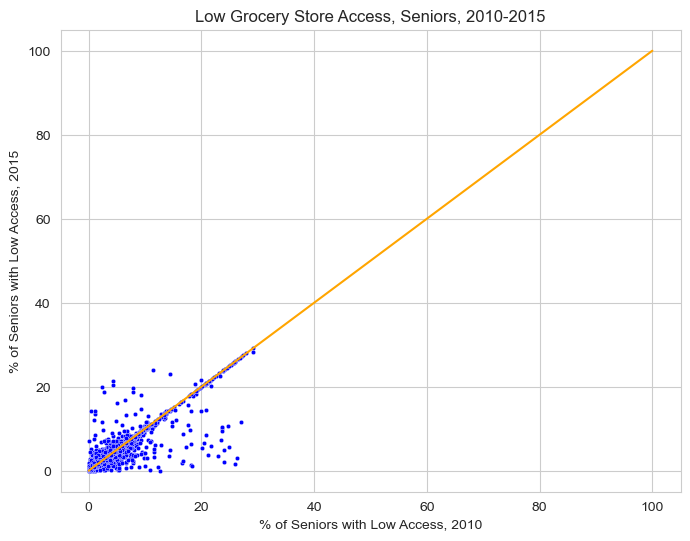

In [20]:
# Change in % of children with access to a grocery store, 2010-2015

fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=access,
    x='PCT_LACCESS_SENIORS10',
    y='PCT_LACCESS_SENIORS15',
    s=10,
    color='blue',
    legend=False
)

ax.set(
    xlabel='% of Seniors with Low Access, 2010',
    ylabel='% of Seniors with Low Access, 2015',
    title='Low Grocery Store Access, Seniors, 2010-2015')

# Line representing no change
sns.lineplot(x=np.linspace(0,100,100), y = np.linspace(0,100,100), color='orange')

plt.show()

In [21]:
median_pct_seniors_2010 = access['PCT_LACCESS_SENIORS10'].median()
seniors_thresh = 15

num_seniors_10_15 = len(access.loc[(access['PCT_LACCESS_SENIORS10'] >= seniors_thresh) & (access['PCT_LACCESS_SENIORS15'] >= seniors_thresh)])
print('Number of counties in which the % of seniors having low access to grocery stores exceeded ' + str(seniors_thresh) + '% in both 2010 and 2015: '  
      + str(num_seniors_10_15) + 
      ' (' + str(np.round(100*num_seniors_10_15/num_counties,2)) + '%)'
     )

num_seniors_10 = len(access.loc[(access['PCT_LACCESS_SENIORS10'] >= seniors_thresh) & (access['PCT_LACCESS_SENIORS15'] < seniors_thresh)])
print('Number of counties in which the % of seniors having low access to grocery stores exceeded ' + str(seniors_thresh) + '% in 2010 but not in 2015: ' 
      + str(num_seniors_10) + 
      ' (' + str(np.round(100*num_seniors_10/num_counties,2)) + '%)'
     )

num_seniors_15 = len(access.loc[(access['PCT_LACCESS_SENIORS10'] < seniors_thresh) & (access['PCT_LACCESS_SENIORS15'] >= seniors_thresh)])
print('Number of counties in which the % of seniors having low access to grocery stores exceeded ' + str(seniors_thresh) + '% in 2015 but not in 2010: '  
      + str(num_seniors_15) + 
      ' (' + str(np.round(100*num_seniors_15/num_counties,2)) + '%)'
     )


num_seniors_above_median = len(access.loc[(access['PCT_LACCESS_SENIORS10'] >= median_pct_seniors_2010)])
num_seniors_above_median_and_improved = len(access.loc[
                                        (access['PCT_LACCESS_SENIORS10'] >= access['PCT_LACCESS_SENIORS15']) & 
                                        (access['PCT_LACCESS_SENIORS10'] >= median_pct_seniors_2010)])
print('Number of counties whose % of seniors with low grocery store access was above the median in 2010, but improved or was equal in 2015: '
      + str(num_seniors_above_median_and_improved) + 
      ' (' + str(np.round(100*num_seniors_above_median_and_improved/num_seniors_above_median,2)) + '% of counties above the median %)'
     )

Number of counties in which the % of seniors having low access to grocery stores exceeded 15% in both 2010 and 2015: 74 (2.44%)
Number of counties in which the % of seniors having low access to grocery stores exceeded 15% in 2010 but not in 2015: 31 (1.02%)
Number of counties in which the % of seniors having low access to grocery stores exceeded 15% in 2015 but not in 2010: 11 (0.36%)
Number of counties whose % of seniors with low grocery store access was above the median in 2010, but improved or was equal in 2015: 1024 (67.59% of counties above the median %)


In [22]:
# Counties with close to 100% of the population having low access to a grocery store
low_access_counties_pop = access.loc[access['PCT_LACCESS_POP15'] >= pop_thresh][['State', 'PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS15']]
low_access_counties_pop

,State,PCT_LACCESS_POP15,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS15
67,AK,70.136900,34.937510,21.937983,7.004139,3.120025
69,AK,100.000000,17.663233,9.798995,22.567703,8.324975
70,AK,100.000001,22.933715,0.449859,22.508215,7.502738
77,AK,99.858101,43.516344,49.194830,30.150286,7.676384
79,AK,58.559728,13.197183,28.818206,10.018337,2.429202
...,...,...,...,...,...,...
2867,VA,53.472564,18.438196,9.945219,6.529933,6.092202
2886,WA,99.585693,37.828217,1.244502,20.034279,22.264623
2896,WA,56.729532,17.720444,1.590642,12.505509,12.100862
2909,WA,80.384312,30.809900,4.402161,15.290334,20.561560


In [23]:
low_access_counties_pop['PCT_LACCESS_LOWI15'].describe()

count    187.000000
mean      31.292660
std       11.470698
min       11.654020
25%       21.470887
50%       31.096079
75%       37.723629
max       71.844209
Name: PCT_LACCESS_LOWI15, dtype: float64

In [24]:
low_access_counties_lowi = access.loc[access['PCT_LACCESS_LOWI15'] >= lowi_thresh][['State', 'PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS15']]
low_access_counties_lowi

,State,PCT_LACCESS_POP15,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS15
396,GA,74.001069,56.601493,26.597474,17.503206,14.181167
540,ID,99.999999,54.891774,1.075269,21.486123,15.935542
1725,NV,97.190294,51.590417,9.115023,16.347382,25.159642
2326,SD,96.759057,59.334818,11.490364,33.610607,10.940740
2331,SD,99.721690,71.844209,11.691859,39.135316,7.142616
2338,SD,89.786884,57.644548,13.031079,30.689570,9.927521
2370,SD,99.402260,56.273491,13.262674,32.159696,13.464605
2597,TX,99.623735,67.265754,4.800966,30.035418,13.515539
2613,TX,97.165659,56.863993,6.870229,23.763267,14.129273


In [25]:
low_access_counties_lowi['PCT_LACCESS_POP15'].describe()

count     9.000000
mean     94.850072
std       8.430334
min      74.001069
25%      96.759057
50%      97.190294
75%      99.623735
max      99.999999
Name: PCT_LACCESS_POP15, dtype: float64